       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Wilshire          784         1     510   
1     Central          182         1     330   
2   Southwest          356         1     480   
3    Van Nuys          964         1     343   
4  Hollenbeck          413         1     510   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2          

<ipython-input-9-5484758083b4>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
<ipython-input-9-5484758083b4>:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])


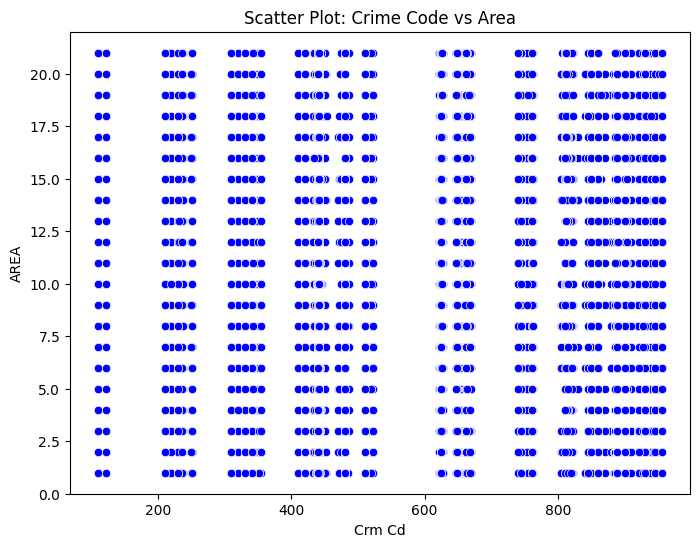

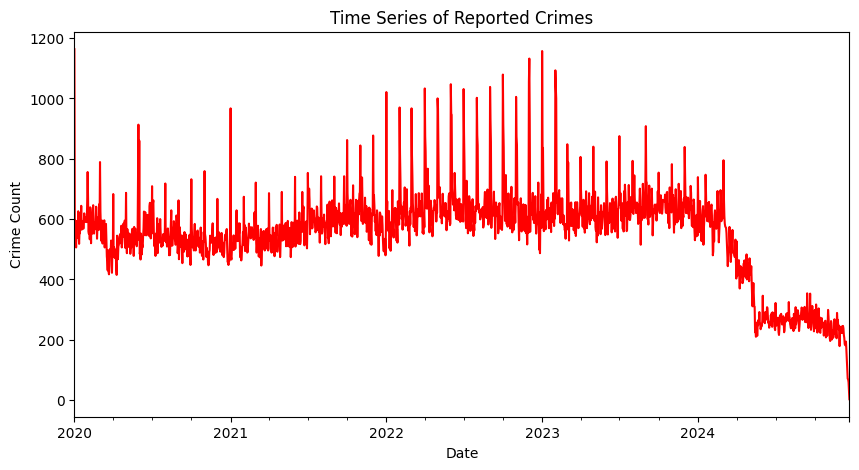

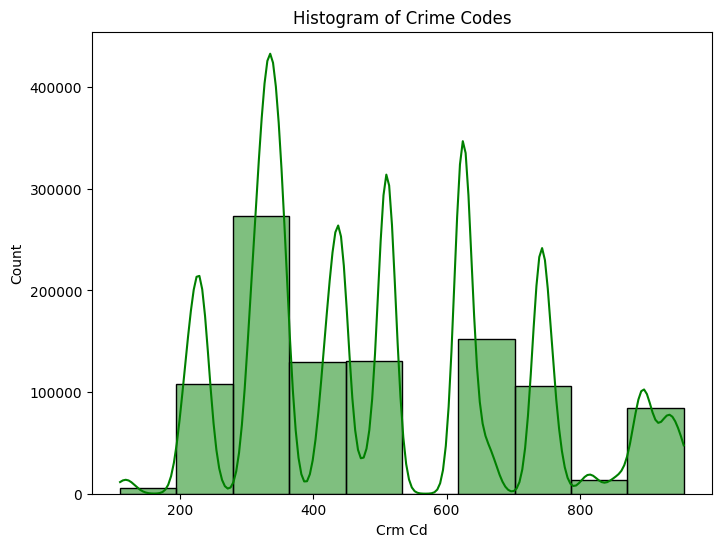

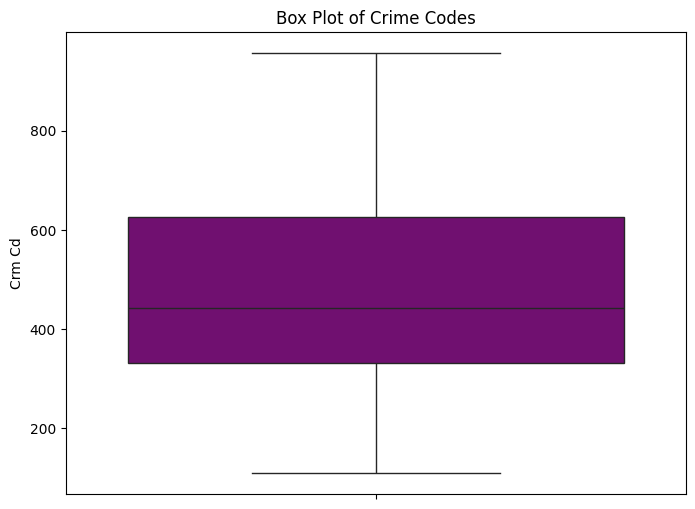

Mean: 500.2210418477091
Standard Deviation: 205.31087562687347
Variance: 42152.55565067351
Skewness: 0.5260117877148225
Kurtosis: -0.6836902166993237


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import skew, kurtosis

# Load dataset (replace 'crime_data.csv' with actual file path)
crime_data = pd.read_csv("/content/Crime_Data_from_2020_to_Present.csv")

# Display first few rows
print(crime_data.head())

# Convert categorical variables to numeric using Label Encoding
label_enc = LabelEncoder()
crime_data['AREA NAME'] = label_enc.fit_transform(crime_data['AREA NAME'])
crime_data['Crm Cd Desc'] = label_enc.fit_transform(crime_data['Crm Cd Desc'])
crime_data['Status Desc'] = label_enc.fit_transform(crime_data['Status Desc'])

# Convert Date columns to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])

# Extract specific columns as vectors
crime_vector = crime_data['Crm Cd']

# Convert numerical data into matrices
crime_matrix = crime_data[['Crm Cd', 'AREA']].to_numpy()

# Create a list combining various objects
crime_list = [crime_vector, crime_matrix, crime_data]

# Convert dataset to DataFrame
crime_df = pd.DataFrame(crime_data)

# Scatter Plot: Relationship between Crime Code and Area
plt.figure(figsize=(8, 6))
sns.scatterplot(x=crime_df["Crm Cd"], y=crime_df["AREA"], color="blue")
plt.title("Scatter Plot: Crime Code vs Area")
plt.show()

# Time Series Visualization (Number of Crimes Over Time)
crime_ts = crime_data.groupby("DATE OCC").size()

plt.figure(figsize=(10, 5))
crime_ts.plot(color="red")
plt.title("Time Series of Reported Crimes")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.show()

# Histogram of Crime Codes
plt.figure(figsize=(8, 6))
sns.histplot(crime_df["Crm Cd"], bins=10, kde=True, color="green")
plt.title("Histogram of Crime Codes")
plt.show()

# Boxplot of Crime Codes
plt.figure(figsize=(8, 6))
sns.boxplot(y=crime_df["Crm Cd"], color="purple")
plt.title("Box Plot of Crime Codes")
plt.show()

# Compute Statistical Measures
mean_crime = crime_df["Crm Cd"].mean()
sd_crime = crime_df["Crm Cd"].std()
variance_crime = crime_df["Crm Cd"].var()
skewness_crime = skew(crime_df["Crm Cd"])
kurtosis_crime = kurtosis(crime_df["Crm Cd"])

# Print Statistical Measures
print(f"Mean: {mean_crime}")
print(f"Standard Deviation: {sd_crime}")
print(f"Variance: {variance_crime}")
print(f"Skewness: {skewness_crime}")
print(f"Kurtosis: {kurtosis_crime}")

# Prepare Data for Modeling (Assuming Crime Code is the target variable)
X = crime_df.drop(columns=["Crm Cd", "DATE OCC", "Date Rptd", "LOCATION", "Cross Street", "LAT", "LON"])  # Features
y = crime_df["Crm Cd"]  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure all features are numeric
X = crime_df.drop(columns=["Crm Cd", "DATE OCC", "Date Rptd", "LOCATION", "Cross Street", "LAT", "LON"])  # Features
y = crime_df["Crm Cd"]  # Target variable

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders in case of inverse transformation

# Fill missing values (if any)
X = X.fillna(0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # No more string-to-float errors!

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc}")



# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc}")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc}")

# Compare Model Performance
model_comparison = pd.DataFrame({
    "Model": ["SVM", "Random Forest", "Decision Tree"],
    "Accuracy": [svm_acc, rf_acc, dt_acc]
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", data=model_comparison, palette="Blues")
plt.title("Model Comparison")
plt.show()
